# 심층신경망을 이용한 유방암분류(텐서플로 1.x)

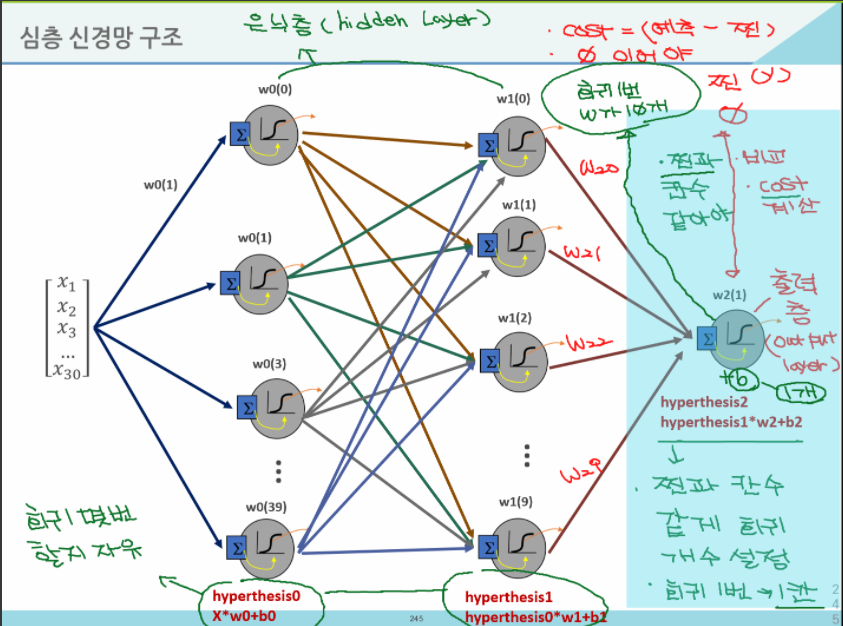

In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
# X
X =cancer.data

# y
y = cancer.target

# X 타입 변환, 텐서플로는 float32 사용
X = np.array(X, dtype = 'float32')

# y 타입 변환, 텐서플로는 float32 사용
y= np.array(y, dtype = 'float32')

In [ ]:
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df['target'] = cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
# y 차원 변환
print("y.shape = ", y.shape)

# reshape(줄, 칸)
print("y.reshape(569, 1) = ", y.reshape(569,1).shape)

# reshape(-1, 1) 
# '-1' -> 전체칸(줄) 자동 선택
print("y.reshape(-1, 1) = ", y.reshape(-1,1).shape)

y.shape =  (569,)
y.reshape(569, 1) =  (569, 1)
y.reshape(-1, 1) =  (569, 1)


In [ ]:
y = y.reshape(-1,1)

In [ ]:
# 훈련, 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X , y)

In [ ]:
# 스케일러 
# 컬럼별 값들을 비슷한 범위로 조정
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
# cost가 0이 되는 w,b를 찾아주는 함수
initializer = tf.contrib.layers.xavier_initializer()

In [ ]:
# w type은  Variable 이어야함
w0 = tf.Variable(initializer([30 , 40]))

# w type은  Variable 이어야함
b0 = tf.Variable(initializer([40]))

In [ ]:
print("w0: \n",w0)
print("b0: \n",b0)

w0: 
 <tf.Variable 'Variable:0' shape=(30, 40) dtype=float32, numpy=
array([[-0.1487964 , -0.28771374,  0.16604343, ..., -0.2137441 ,
        -0.13937321, -0.00593412],
       [ 0.01945636, -0.02386469, -0.27493113, ...,  0.11264974,
        -0.04723006,  0.10733193],
       [-0.01794639,  0.28980422,  0.27498597, ..., -0.03932375,
        -0.06923963,  0.00163078],
       ...,
       [ 0.23884517,  0.22718334, -0.06864353, ..., -0.1073205 ,
         0.09217545, -0.03449389],
       [-0.22797859, -0.02523986,  0.21588606, ..., -0.06316827,
         0.18306601,  0.2823149 ],
       [ 0.0847789 , -0.1628863 , -0.20079386, ...,  0.00445357,
        -0.05544099,  0.11323607]], dtype=float32)>
b0: 
 <tf.Variable 'Variable:0' shape=(40,) dtype=float32, numpy=
array([ 0.27012277,  0.24906868, -0.21675575,  0.25107527,  0.24469817,
        0.07386196, -0.15728033, -0.07766134,  0.23554981,  0.16604337,
       -0.0150204 ,  0.15422967, -0.11080869,  0.16637403,  0.04994544,
        0.26705748, 

In [ ]:
# 1차 예측
# 예측 
hypothesis0 = tf.matmul(X_train, w0) + b0

# 예측값을 0~1 사이의 값으로 변환
hypothesis0  = tf.sigmoid(hypothesis0)

In [ ]:
# X_train 차원 형태
print("X_train.shape = ", X_train.shape)

# w0 차원 형태 : 회귀를 40번 할려고 함
print("w0.shape = ", w0.shape)

# 차원 곱셈시 X_train의 칸과  w0의 줄이 동일해야함
print("X_train의 칸 : {} , w0의 줄 : {}".format(X_train.shape[1], w0.shape[0]))

# 예측값 차원 형태 -> 426줄을 40번 회귀한 값
print("hypothesis0.shape = ",hypothesis0.shape)

X_train.shape =  (426, 30)
w0.shape =  (30, 40)
X_train의 칸 : 30 , w0의 줄 : 30
hypothesis0.shape =  (426, 40)


In [ ]:
# w type은  Variable 이어야함
w1 = tf.Variable(initializer([40 , 10]))

# w type은  Variable 이어야함
b1 = tf.Variable(initializer([10]))

In [ ]:
# 2차 예측
# 예측
hypothesis1 = tf.matmul(hypothesis0, w1) + b1

# 예측값을 0~1 사이로 값으로 변환, 활성화함수 sigmoid 사용
hypothesis1 = tf.sigmoid(hypothesis1)

In [ ]:
# 예측값 차원 형태 -> 426줄을 40번 회귀한 값
print("hypothesis0.shape = ",hypothesis0.shape)

# w1 차원 형태 : 회귀를 10번 할려고 함
print("w0.shape = ", w1.shape)

# 차원 곱셈시 hypothesis0의 칸과  w1의 줄이 동일해야함
print("hypothesis0 의 칸 : {} , w1의 줄 : {}".format(hypothesis0.shape[1], w1.shape[0]))

hypothesis0.shape =  (426, 40)
w0.shape =  (40, 10)
hypothesis0 의 칸 : 40 , w1의 줄 : 40


In [ ]:
# w type은  Variable 이어야함
w2 = tf.Variable(initializer([10,1]))

# b type은  Variable 이어야함
b2 = tf.Variable(initializer([1]))

In [ ]:
# 3차 예측
# 예측
hypothesis2 = tf.matmul(hypothesis1, w2) + b2

# 예측값을 0~1 사이로 값으로 변환, 활성화함수 sigmoid 사용
hypothesis2 = tf.sigmoid(hypothesis2)

print(hypothesis2.shape)

(426, 1)


In [ ]:
# 예측값 차원 형태 -> 426줄을 10번 회귀한 값
print("hypothesis1.shape = ",hypothesis1.shape)

# w2 차원 형태 : 회귀를 1번 할려고 함
print("w2.shape = ", w2.shape)

# 차원 곱셈시 hypothesis0의 칸과  w1의 줄이 동일해야함
print("hypothesis1 의 칸 : {} , w2의 줄 : {}".format(hypothesis1.shape[1], w2.shape[0]))

hypothesis1.shape =  (426, 10)
w2.shape =  (10, 1)
hypothesis1 의 칸 : 10 , w2의 줄 : 10


In [ ]:
hypothesis0 = tf.sigmoid(tf.matmul(X_train, w0)+b0)
print("="* 100)
print("hypothesis0 = ", hypothesis0)
print("="* 100)

hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1)+b1)
print("hypothesis1 = ", hypothesis1)
print("="* 100)

hypothesis2 = tf.sigmoid(tf.matmul(hypothesis1, w2)+b2)
print("hypothesis1 = ", hypothesis2)
print("="* 100)

cost = -tf.reduce_mean( y_train * tf.log(hypothesis2)+ (1-y_train)*tf.log(1-hypothesis2))
print("cost = ", cost)

In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)

In [ ]:
for step in range(1001):
    print("="*100)
    print("step = ",step)

    with tf.GradientTape() as tape:
        hypothesis0 = tf.sigmoid( tf.matmul(X_train, w0)+ b0)
        # print("="*100)
        # #print("hypothesis0 = ", hypothesis0)
        # print("="*100)
        hypothesis1 = tf.sigmoid( tf.matmul(hypothesis0, w1) + b1)
        # print("="*100)
        # print("hypothesis1 = ", hypothesis1)
        # print("="*100)
        hypothesis2 = tf.sigmoid( tf.matmul(hypothesis1, w2) + b2)
        # print("="*100)
        # print("hypothesis2 = ", hypothesis2)
        # print("="*100)
        cost = -tf.reduce_mean( y_train * tf.log(hypothesis2)+ (1-y_train)*tf.log(1-hypothesis2))
        print("cost = ", cost)

    grads = tape.gradient(cost, [w0,w1,w2, b0,b1,b2])
    #print("grads(기울기) = ", grads)
    optimizer.apply_gradients(grads_and_vars = zip(grads, [w0,w1,w2,b0,b1,b2]))

step =  0
cost =  tf.Tensor(0.7127642, shape=(), dtype=float32)
step =  1
cost =  tf.Tensor(0.65337896, shape=(), dtype=float32)
step =  2
cost =  tf.Tensor(0.6090717, shape=(), dtype=float32)
step =  3
cost =  tf.Tensor(0.57477546, shape=(), dtype=float32)
step =  4
cost =  tf.Tensor(0.54429215, shape=(), dtype=float32)
step =  5
cost =  tf.Tensor(0.5135933, shape=(), dtype=float32)
step =  6
cost =  tf.Tensor(0.48162264, shape=(), dtype=float32)
step =  7
cost =  tf.Tensor(0.448996, shape=(), dtype=float32)
step =  8
cost =  tf.Tensor(0.41681814, shape=(), dtype=float32)
step =  9
cost =  tf.Tensor(0.38608888, shape=(), dtype=float32)
step =  10
cost =  tf.Tensor(0.35747293, shape=(), dtype=float32)
step =  11
cost =  tf.Tensor(0.3312797, shape=(), dtype=float32)
step =  12
cost =  tf.Tensor(0.30754393, shape=(), dtype=float32)
step =  13
cost =  tf.Tensor(0.2861288, shape=(), dtype=float32)
step =  14
cost =  tf.Tensor(0.2668101, shape=(), dtype=float32)
step =  15
cost =  tf.Tensor

In [ ]:
X_test = scaler.transform(X_test)
X_test

array([[   -5.08067  ,    -5.4680223,    -3.8660479, ...,   -54.72952  ,
         -182.04463  ,  -598.9844   ],
       [   -4.995668 ,    -5.525052 ,    -3.8643446, ...,   -38.074326 ,
         -133.45801  , -2413.2346   ],
       [   -5.125236 ,    -5.4926543,    -3.866935 , ...,  -232.32849  ,
          -11.108089 ,   373.71664  ],
       ...,
       [   -5.0191464,    -5.4647465,    -3.864609 , ...,   297.06943  ,
         -108.72299  ,  -505.30496  ],
       [   -5.1228447,    -5.3703437,    -3.8668985, ...,  -111.5952   ,
         -377.27435  ,  -428.80127  ],
       [   -5.03306  ,    -5.5046673,    -3.8650155, ...,    58.797836 ,
          -11.991494 ,   322.19296  ]], dtype=float32)

# 다중분류를 이용한 포유류,조류 분류 (텐서플로 1.x)

In [ ]:
%tensorflow_version 1.x

In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
# 훈련 데이터
X = np.array([
              [0, 0],
              [1, 0],
              [1, 1],
              [0, 0],
              [0, 1],
], dtype = 'float32')

# 정답 데이터
y = np.array([
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [1, 0, 0],
              [0, 0, 1],
], dtype = 'float32')

In [ ]:
# cost가 0으로 수렴하는데 적절한 w,b 선택해줌
initializer = tf.contrib.layers.xavier_initializer()

In [ ]:
# 선형회귀 10번 
# 노드 하나당 2번 계산, 20개의 weight 필요
# x1 * w0 + x2 * w1 

# weight
w0 = tf.Variable(initializer([2, 10]))

# bias
b0 = tf.Variable(initializer([10]))

In [ ]:
# 1차 예측
# 예측 
hypothesis0 = tf.matmul(X, w0) + b0

# 예측값을 0~1 사이의 값으로 변환
hypothesis0  = tf.sigmoid(hypothesis0)

In [ ]:
# shape 확인
print("X.shape :",X.shape)

print("w0.shape :", w0.shape)

print("hypothesis0.shape :",hypothesis0.shape)

X.shape : (5, 2)
w0.shape : (2, 10)
hypothesis0.shape : (5, 10)


In [ ]:
# 선형회귀 3번

# weight
w1 = tf.Variable(initializer([10, 3]))

# bias
b1 = tf.Variable(initializer([3]))

In [ ]:
# 2차 예측
# 예측 
hypothesis1 = tf.matmul(hypothesis0, w1) + b1

# 활성화 함수 softmax
# softmax 함수 -> 확률로 나타내는데, 진짜인거 같은것에 높은 확률을 줌
hypothesis1 = tf.nn.softmax(hypothesis1)

<tf.Tensor: id=159, shape=(5, 3), dtype=float32, numpy=
array([[0.4280173 , 0.2712747 , 0.30070806],
       [0.43685114, 0.27366313, 0.28948575],
       [0.44507593, 0.2661186 , 0.2888054 ],
       [0.4280173 , 0.27127466, 0.300708  ],
       [0.43725482, 0.26413774, 0.2986074 ]], dtype=float32)>

In [ ]:
# shape 확인
print("hypothesis0.shape :",hypothesis0.shape)

print("w1.shape :", w1.shape)

print("hypothesis1.shape :",hypothesis1.shape)

hypothesis0.shape : (5, 10)
w1.shape : (10, 3)
hypothesis1.shape : (5, 3)


In [ ]:
# cost
cost = -tf.reduce_mean(y * tf.log(hypothesis1))
cost

<tf.Tensor: id=171, shape=(), dtype=float32, numpy=0.226085>

In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)

In [ ]:
for step in range(1001):
  with tf.GradientTape() as tape:
    hypothesis0 = tf.sigmoid(tf.matmul(X, w0)+b0)

    hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1)+ b1)

    cost = -tf.reduce_mean(y * tf.log(hypothesis1))

    grads = tape.gradient(cost, [w0, w1, b0, b1])

    optimizer.apply_gradients(grads_and_vars = zip(grads, [w0, w1, b0, b1]))

    if step % 100 ==0:
      print("=" * 50)
      print("step: {}, cost:{}".format(step, cost.numpy()))
      print("="*50)

step: 0, cost:0.4655565917491913
step: 100, cost:0.17172950506210327
step: 200, cost:0.027200447395443916
step: 300, cost:0.009229065850377083
step: 400, cost:0.004754220601171255
step: 500, cost:0.0029410033021122217
step: 600, cost:0.002014542929828167
step: 700, cost:0.0014724957291036844
step: 800, cost:0.0011258346494287252
step: 900, cost:0.0008896595682017505
step: 1000, cost:0.0007210096810013056


In [ ]:
# 예측
hypothesis0 = tf.sigmoid(tf.matmul(X, w0) +b0)

predict = tf.nn.softmax(tf.matmul(hypothesis0, w1) +b1)

In [ ]:
# 각 줄의 최댓값 인덱스 리턴
predict01 = tf.argmax(predict,1)

# 정답값의 최댓값 인덱스 리턴
target = tf.argmax(y, 1)

# 두개가 동일한지 비교 -> True, Flase
ac01 = tf.equal(predict01,target)

# True -> 1, False -> 0으로 변환
ac02 = tf.cast(ac01, dtype = "float32")

# 정확도
ac03 = tf.reduce_mean(ac02)
print("정확도 : ",ac03)

정확도 :  tf.Tensor(1.0, shape=(), dtype=float32)


# 실습

## 심층 신경망을 이용한 유방암 분류 (텐서플로 1.x)

- 231 ~ 256

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
# X
X =cancer.data

# y
y = cancer.target

# X 타입 변환, 텐서플로는 float32 사용
X = np.array(X, dtype = 'float32')

# y 타입 변환, 텐서플로는 float32 사용
y= np.array(y, dtype = 'float32').reshape(-1, 1)

In [ ]:
# 훈련, 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X , y)

In [ ]:
# 스케일러 
# 컬럼별 값들을 비슷한 범위로 조정
# X에서 평균을 뺴고 표준편차로 나눠서 평균 ->0, 표준편차 -> 1 로 변환
scaler = StandardScaler()

# X_train 평균, 표준편차 계산
scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
# cost가 0이 되는 w,b를 찾아주는 함수
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
# type = Variable

# 1차
w0 = tf.Variable(initializer([30 , 30]))

b0 = tf.Variable(initializer([30]))

# 2차
w1 = tf.Variable(initializer([30 , 10]))

b1 = tf.Variable(initializer([10]))

# 3차
w2 = tf.Variable(initializer([10 , 1]))

b2 = tf.Variable(initializer([1]))

In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)

In [ ]:
for step in range(1001):
    with tf.GradientTape() as tape:
        hypothesis0 = tf.sigmoid( tf.matmul(X_train, w0)+ b0)
 
        hypothesis1 = tf.sigmoid( tf.matmul(hypothesis0, w1) + b1)

        hypothesis2 = tf.sigmoid( tf.matmul(hypothesis1, w2) + b2)

        cost = -tf.reduce_mean( y_train * tf.log(hypothesis2)+ (1-y_train)*tf.log(1-hypothesis2))

        grads = tape.gradient(cost, [w0,w1,w2, b0,b1,b2])

        optimizer.apply_gradients(grads_and_vars = zip(grads, [w0,w1,w2,b0,b1,b2]))

        if step % 100 == 0:
          print("="*50)
          print("step : {}, cost : {}".format(step, cost.numpy()))
          print("="*50)

step : 0, cost : 1.5251657962799072
step : 100, cost : 0.10819284617900848
step : 200, cost : 0.051201220601797104
step : 300, cost : 0.030002158135175705
step : 400, cost : 0.022291190922260284
step : 500, cost : 0.019371407106518745
step : 600, cost : 0.01799738220870495
step : 700, cost : 0.017248373478651047
step : 800, cost : 0.016795437783002853
step : 900, cost : 0.01649998314678669
step : 1000, cost : 0.016296178102493286


In [ ]:
# X_train의 평균과 표준편차를 계산 scaler로 X_test도 변환 해야함
X_test = scaler.transform(X_test)

# 예측1
hypothesis0 = tf.sigmoid(tf.matmul(X_test, w0)+b0)

# 예측2
hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1)+b1)

# 최종 예측
predict = tf.sigmoid(tf.matmul(hypothesis1, w2)+b2)

In [ ]:
predict01 = tf.cast(predict > 0.5, dtype =tf.float32)

ac01 = tf.equal(predict01, y_test)

ac02 = tf.cast(ac01, dtype ="float32")

ac03 = tf.reduce_mean(ac02)
print("정확도 : ",ac03)

정확도 :  tf.Tensor(0.97202796, shape=(), dtype=float32)


## 심층 신경망을 이용한 유방암 분류 (텐서플로 2.x)

- 257 ~ 273

In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
data = datasets.load_breast_cancer()

In [ ]:
# X
X =data.data

# y
y = data.target

In [ ]:
# 훈련, 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X , y)

In [ ]:
# 스케일러 
# 컬럼별 값들을 비슷한 범위로 조정
# X에서 평균을 뺴고 표준편차로 나눠서 평균 ->0, 표준편차 -> 1 로 변환
scaler = StandardScaler()

# X_train 평균, 표준편차 계산
scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
#  객체 생성
model = Sequential()

# 출력 칸수는 30
# input_dim : 입력데이터 X의 칸의 수는 30
model.add(Dense(30,input_dim = 30, activation = 'sigmoid'))

model.add(Dense(10, activation = 'sigmoid'))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

# loss : 손실함수
# optimizer = Adam 사용하고 러닝레이트는 0.0001
# metrics = ['acc] : 정확도 출력
model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics = ['acc'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
14/14 [==============================] - 1s 2ms/step - loss: 0.6792 - acc: 0.6174
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6738 - acc: 0.6244
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6684 - acc: 0.6221
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6631 - acc: 0.6221
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6581 - acc: 0.6221
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6531 - acc: 0.6197
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6481 - acc: 0.6197
Epoch 8/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6433 - acc: 0.6197
Epoch 9/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6385 - acc: 0.6197
Epoch 10/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6337 - acc: 0.6197
Epoch 11/1000
14/14 [============================

In [ ]:
X_test =  scaler.transform(X_test)

pred = model.predict(X_test)

predict01 = np.where(pred > 0.5, 1,0)

predict02 = predict01.flatten()

predict03 = (predict02 == y_test)

acc = np.sum(predict03)/len(predict03)
print("정확도 : ",acc)

정확도 :  0.972027972027972


## 다중 분류를 이용한 포유류, 조류분류(텐서플로 1.x)

- 285 ~ 310

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
# 훈련 데이터
X = np.array([
              [0, 0],
              [1, 0],
              [1, 1],
              [0, 0],
              [0, 1],
], dtype = 'float32')

# 정답 데이터
y = np.array([
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [1, 0, 0],
              [0, 0, 1],
], dtype = 'float32')

In [ ]:
# cost가 0으로 수렴하는데 적절한 w,b 선택해줌
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
# weight
w0 = tf.Variable(initializer([2, 10]))

# bias
b0 = tf.Variable(initializer([10]))

# weight
w1 = tf.Variable(initializer([10, 3]))

# bias
b1 = tf.Variable(initializer([3]))

In [ ]:
# 1차 예측
# 예측 
hypothesis0 = tf.matmul(X, w0) + b0

# 예측값을 0~1 사이의 값으로 변환
hypothesis0  = tf.sigmoid(hypothesis0)

# 2차 예측
# 예측 
hypothesis1 = tf.matmul(hypothesis0, w1) + b1

# 활성화 함수 softmax
# softmax 함수 -> 확률로 나타내는데, 진짜인거 같은것에 높은 확률을 줌
hypothesis1 = tf.nn.softmax(hypothesis1)

print(hypothesis1)

tf.Tensor(
[[0.21499588 0.09673163 0.6882724 ]
 [0.21138947 0.10209084 0.68651974]
 [0.21949922 0.0960512  0.6844496 ]
 [0.21499588 0.09673163 0.6882724 ]
 [0.2258333  0.09332795 0.6808388 ]], shape=(5, 3), dtype=float32)


In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)

In [ ]:
for step in range(1001):
  with tf.GradientTape() as tape:
    hypothesis0 = tf.sigmoid(tf.matmul(X, w0)+b0)

    hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1)+ b1)

    cost = -tf.reduce_mean(y * tf.log(hypothesis1))

    grads = tape.gradient(cost, [w0, w1, b0, b1])

    optimizer.apply_gradients(grads_and_vars = zip(grads, [w0, w1, b0, b1]))

    if step % 100 ==0:
      print("=" * 50)
      print("step: {}, cost:{}".format(step, cost.numpy()))
      print("="*50)

step: 0, cost:0.40798234939575195
step: 100, cost:0.11125652492046356
step: 200, cost:0.02056073024868965
step: 300, cost:0.007721001747995615
step: 400, cost:0.004094456788152456
step: 500, cost:0.002564608585089445
step: 600, cost:0.0017687507206574082
step: 700, cost:0.0012985155917704105
step: 800, cost:0.0009958649752661586
step: 900, cost:0.00078880216460675
step: 1000, cost:0.0006404047016985714


In [ ]:
# 예측
hypothesis0 = tf.sigmoid(tf.matmul(X, w0) +b0)

predict = tf.nn.softmax(tf.matmul(hypothesis0, w1) +b1)

# 각 줄의 최댓값 인덱스 리턴
predict01 = tf.argmax(predict,1)

# 정답값의 최댓값 인덱스 리턴
target = tf.argmax(y, 1)

# 두개가 동일한지 비교 -> True, Flase
ac01 = tf.equal(predict01,target)

# True -> 1, False -> 0으로 변환
ac02 = tf.cast(ac01, dtype = "float32")

# 정확도
ac03 = tf.reduce_mean(ac02)
print("정확도 : ",ac03.numpy())

정확도 :  1.0


## 다중 분류를 이용한 포유류, 조류 분류(텐서플로 2.x)

- 302 ~ 312

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
# 훈련 데이터
X = np.array([
              [0, 0],
              [1, 0],
              [1, 1],
              [0, 0],
              [0, 1],
], dtype = 'float32')

# 정답 데이터
y = np.array([
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [1, 0, 0],
              [0, 0, 1],
], dtype = 'float32')

In [ ]:
# 객체 생성
model = Sequential()

# 히든레이어 1층
# 입력 칸수 2, 출력 칸수 10
model.add(Dense(10, input_dim = 2, activation = 'sigmoid'))

# 출력 칸수 3
# 선형회귀 후 softmax 사용
model.add(Dense(3, activation = 'softmax'))

model.summary()

# 'categorical_crossentropy' : -(y * tf.log(hypothesis1)) 합이 최소가 되는 w,b찾기
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 1s 702ms/step - loss: 1.3055 - acc: 0.2000
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.2671 - acc: 0.2000
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.2328 - acc: 0.2000
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.2026 - acc: 0.2000
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.1760 - acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.1527 - acc: 0.4000
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.1325 - acc: 0.4000
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.1149 - acc: 0.4000
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.0998 - acc: 0.4000
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.0867 - acc: 0.4000
Epoch 11/1000
1/1 [==============================] - 0s 9m

In [ ]:
predict = model.predict(X)

# 각 줄의 최댓값 인덱스 리턴
predict01 = np.argmax(predict,1)

# 정답값의 최댓값 인덱스 리턴
target = tf.argmax(y, 1)

# 두개가 동일한지 비교 -> True, Flase
predict02 = (predict01 == target)

# 정확도
ac03 = np.sum(predict02)/len(predict02)
print("정확도 : ",ac03)

정확도 :  1.0
